In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

In [2]:
coords = [
    (48.8566, 2.3522),   # Paris
    (43.6108, 3.8767),   # Montpellier
    (43.7044, 7.2622),   # Nice
    (45.75, 4.85),       # Lyon
    (47.2184, -1.5536),  # Nantes
    (43.2965, 5.3698),   # Marseille
    (48.5734, 7.7521),   # Strasbourg
    (48.8566, 2.3522),   # Bordeaux
    (50.6292, 3.0573),   # Lille
    (48.1173, -1.6778)   # Rennes
]

y = np.array([coord[0] for coord in coords])
x = np.array([coord[1] for coord in coords])

temp = [25.4, 28.1, 30.5, 27.8, 24.6, 31.2, 26.3, 29.7, 23.8, 27.5]

Text(0.5, 1.0, 'Températures observées')

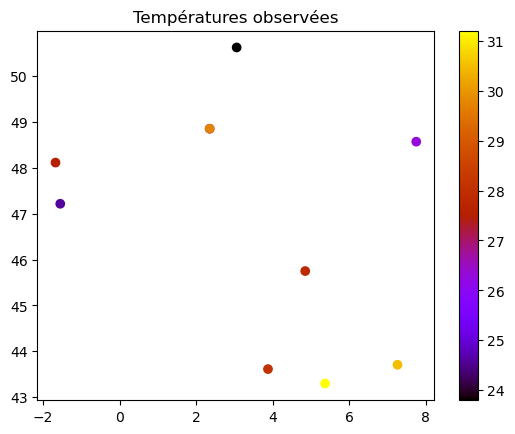

In [3]:
plotxy = plt.scatter(x, y, c=temp, cmap="gnuplot")
plotcolor = plt.colorbar(plotxy) #argument 'fraction=' pour reduire la taille de la barre de couleurs
plt.title('Températures observées')

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'spherical' Variogram Model
Partial Sill: 1.4996290229687568
Full Sill: 5.96431974485977
Range: 9.576228548208059
Nugget: 4.464690721891013 



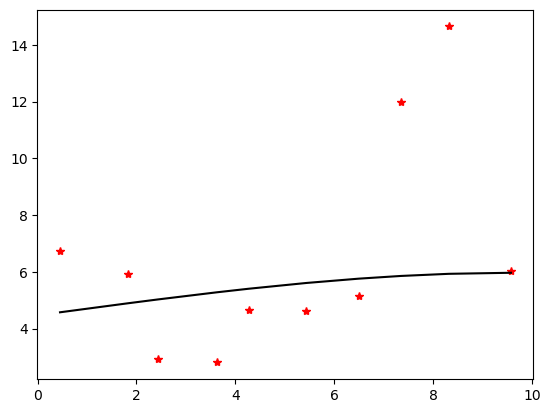

Calculating statistics on variogram model fit...


In [4]:
OK = OrdinaryKriging(
    x, 
    y, 
    temp, 
    variogram_model='spherical',
    verbose=True,
    enable_plotting=True,
    nlags=10,
)

palier : ~7

In [90]:
gridx = np.arange(40, 55, 0.1, dtype='float64')
gridy = np.arange(-7, 10, 0.1, dtype='float64')
predi_val, predi_var = OK.execute("grid", gridx, gridy)

Executing Ordinary Kriging...



Text(0.5, 1.0, 'Estimation de la température')

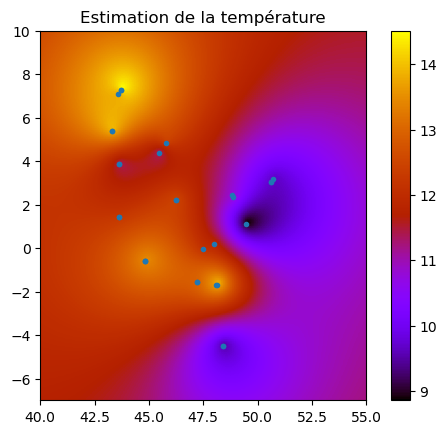

In [91]:
predi_val_plot = plt.imshow(predi_val, extent=(40, 55, -7, 10), origin='lower', cmap='gnuplot')
plt.scatter(x, y, marker='.')
colorbar = plt.colorbar(predi_val_plot)
plt.title('Estimation de la température')

Text(0.5, 1.0, 'Ecart type')

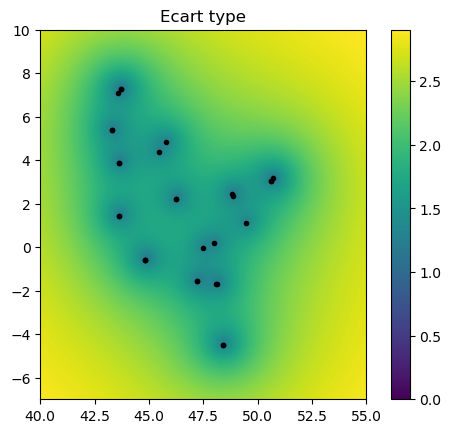

In [72]:
predi_var_plot = plt.imshow(np.sqrt(predi_var), extent=(40, 55, -7, 10), origin='lower', vmin = 0)
plt.scatter(x, y, c='k', marker='.')
cbar=plt.colorbar(predi_var_plot)
plt.title('Ecart type')

Text(0.5, 1.0, 'Erreur de variance')

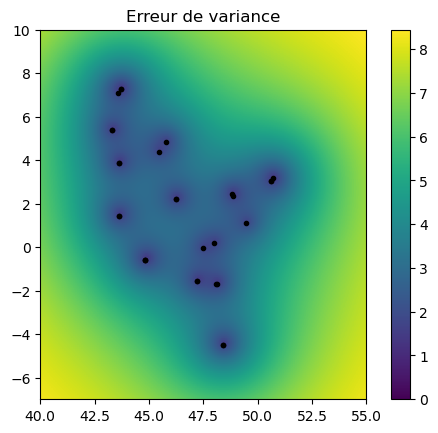

In [73]:
predi_var_plot = plt.imshow(predi_var, extent=(40, 55, -7, 10), origin='lower', vmin = 0)
plt.scatter(x, y, c='k', marker='.')
cbar=plt.colorbar(predi_var_plot)
plt.title('Erreur de variance')

on remarque que le palier (variance des données) est bien ~7
donc l'incertitude max ne grandit plus après avoir atteint le palier